In [6]:
# 단계 1: 폰트 설치
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null



fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [ ]:
# 단계 2: 런타임 재시작
import os
os.kill(os.getpid(), 9)

In [1]:
# 단계 3: 한글 폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설치

In [2]:
import kagglehub

# 데이터 다운로드
path = kagglehub.dataset_download("silicon99/dft-accident-data")

print("Path to dataset files:", path)

100%|██████████| 112M/112M [00:01<00:00, 95.4MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/silicon99/dft-accident-data/versions/3


In [2]:
import pandas as pd

accidents = pd.read_csv('/root/.cache/kagglehub/datasets/silicon99/dft-accident-data/versions/3/Accidents0515.csv', on_bad_lines='skip')
accidents.dropna(how='any', inplace=True)

casualites = pd.read_csv('/root/.cache/kagglehub/datasets/silicon99/dft-accident-data/versions/3/Casualties0515.csv', on_bad_lines='skip')
casualites.dropna(how='any', inplace=True)

vehices = pd.read_csv('/root/.cache/kagglehub/datasets/silicon99/dft-accident-data/versions/3/Vehicles0515.csv', on_bad_lines='skip')
vehices.dropna(how='any', inplace=True)

df = pd.DataFrame()

mergeData = pd.merge(pd.merge(accidents, casualites,on='Accident_Index'), vehices, on='Accident_Index')
df[['Accident_Index', 'Age_of_Driver', 'Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions', 'Journey_Purpose_of_Driver', 'Day_of_Week', 'Time', 'Speed_limit', 'Longitude', 'Latitude', 'Number_of_Casualties', 'Road_Type']] = mergeData[['Accident_Index', 'Age_of_Driver', 'Accident_Severity', 'Weather_Conditions', 'Road_Surface_Conditions', 'Journey_Purpose_of_Driver', 'Day_of_Week', 'Time', 'Speed_limit', 'Longitude', 'Latitude', 'Number_of_Casualties', 'Road_Type']]
#인덱스, 운전자 연령, 사고 심각도, 날씨, 도로표면상태, 운전목적, 요일, 시간, 도로 속도 제한, 경도, 위도
print(df.info())
df.to_csv('Drive.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004836 entries, 0 to 4004835
Data columns (total 13 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   Accident_Index             object 
 1   Age_of_Driver              int64  
 2   Accident_Severity          int64  
 3   Weather_Conditions         int64  
 4   Road_Surface_Conditions    int64  
 5   Journey_Purpose_of_Driver  int64  
 6   Day_of_Week                int64  
 7   Time                       object 
 8   Speed_limit                int64  
 9   Longitude                  float64
 10  Latitude                   float64
 11  Number_of_Casualties       int64  
 12  Road_Type                  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 397.2+ MB
None


<ipython-input-2-010803bb35c1>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_severity = df.groupby('Age_Group')


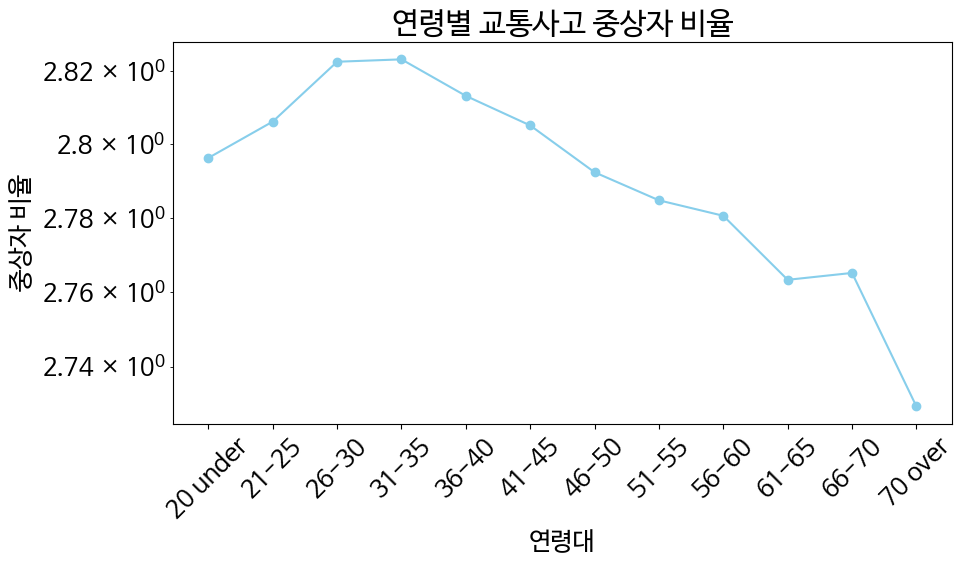

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive = pd.read_csv("./Drive.csv")
Drive.replace(-1, np.nan, inplace=True)
Drive.dropna(inplace=True)

df = Drive.loc[:, ['Age_of_Driver', 'Accident_Severity']]
df = df[df['Age_of_Driver'] > 17] # 17이상

bins = [17, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 100]
labels = ['20 under', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65', '66-70', '70 over']

df['Age_Group'] = pd.cut(df['Age_of_Driver'], bins=bins, labels=labels, right=True) #연령 그룹화
df.drop('Age_of_Driver', axis=1, inplace=True)

def count(x):
  return x[x!=1].sum()/x.count() #경상제외

age_severity = df.groupby('Age_Group')
data = age_severity.agg(count)
data = data.reset_index()

plt.figure(figsize=(10, 6))
plt.plot(data['Age_Group'], data['Accident_Severity'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('연령대')
plt.ylabel('중상자 비율')
plt.title('연령별 교통사고 중상자 비율')
plt.xticks(rotation=45)

plt.yscale('log')
plt.tight_layout()
plt.show()



<ipython-input-2-e456e2cb5f6e>:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Time'] = df.groupby(pd.Grouper(key='Time', freq='1H'))['Time'].transform('first').dt.strftime('%H:%M')


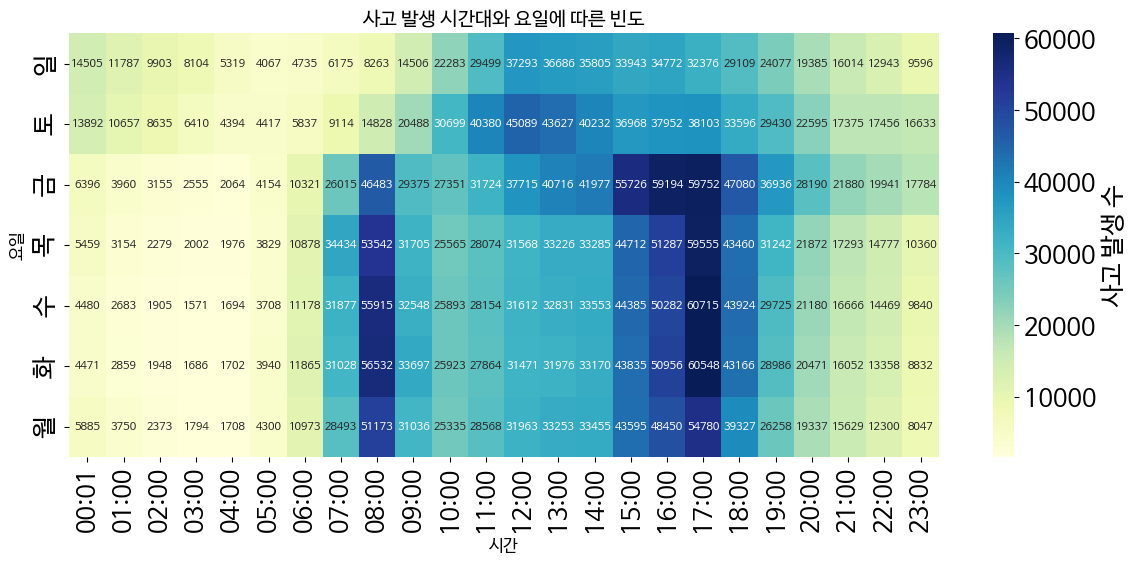

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./Drive.csv")
df.drop(['Age_of_Driver', 'Accident_Index', 'Unnamed: 0'], axis=1, inplace=True)

# 형식 변환
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')
df['Time'] = df.groupby(pd.Grouper(key='Time', freq='1H'))['Time'].transform('first').dt.strftime('%H:%M')

day_mapping = {
    1: '일',
    2: '월',
    3: '화',
    4: '수',
    5: '목',
    6: '금',
    7: '토',
}
df['Day_of_Week'] = df['Day_of_Week'].map(day_mapping)


# 사고 발생 빈도를 계산 (시간대와 요일 기준)
heatmap_data = df.groupby(['Day_of_Week', 'Time']).size().unstack(fill_value=0)

day_order = ['일', '토', '금', '목', '수', '화', '월']
heatmap_data.index = pd.Categorical(heatmap_data.index, categories=day_order, ordered=True)
heatmap_data = heatmap_data.sort_index()

# 히트맵 그리기
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': '사고 발생 수'},
            annot_kws={'size': 8})

plt.title('사고 발생 시간대/요일에 따른 빈도', fontsize=14)
plt.ylabel('요일', fontsize=12)
plt.xlabel('시간', fontsize=12)
plt.tight_layout()
plt.show()

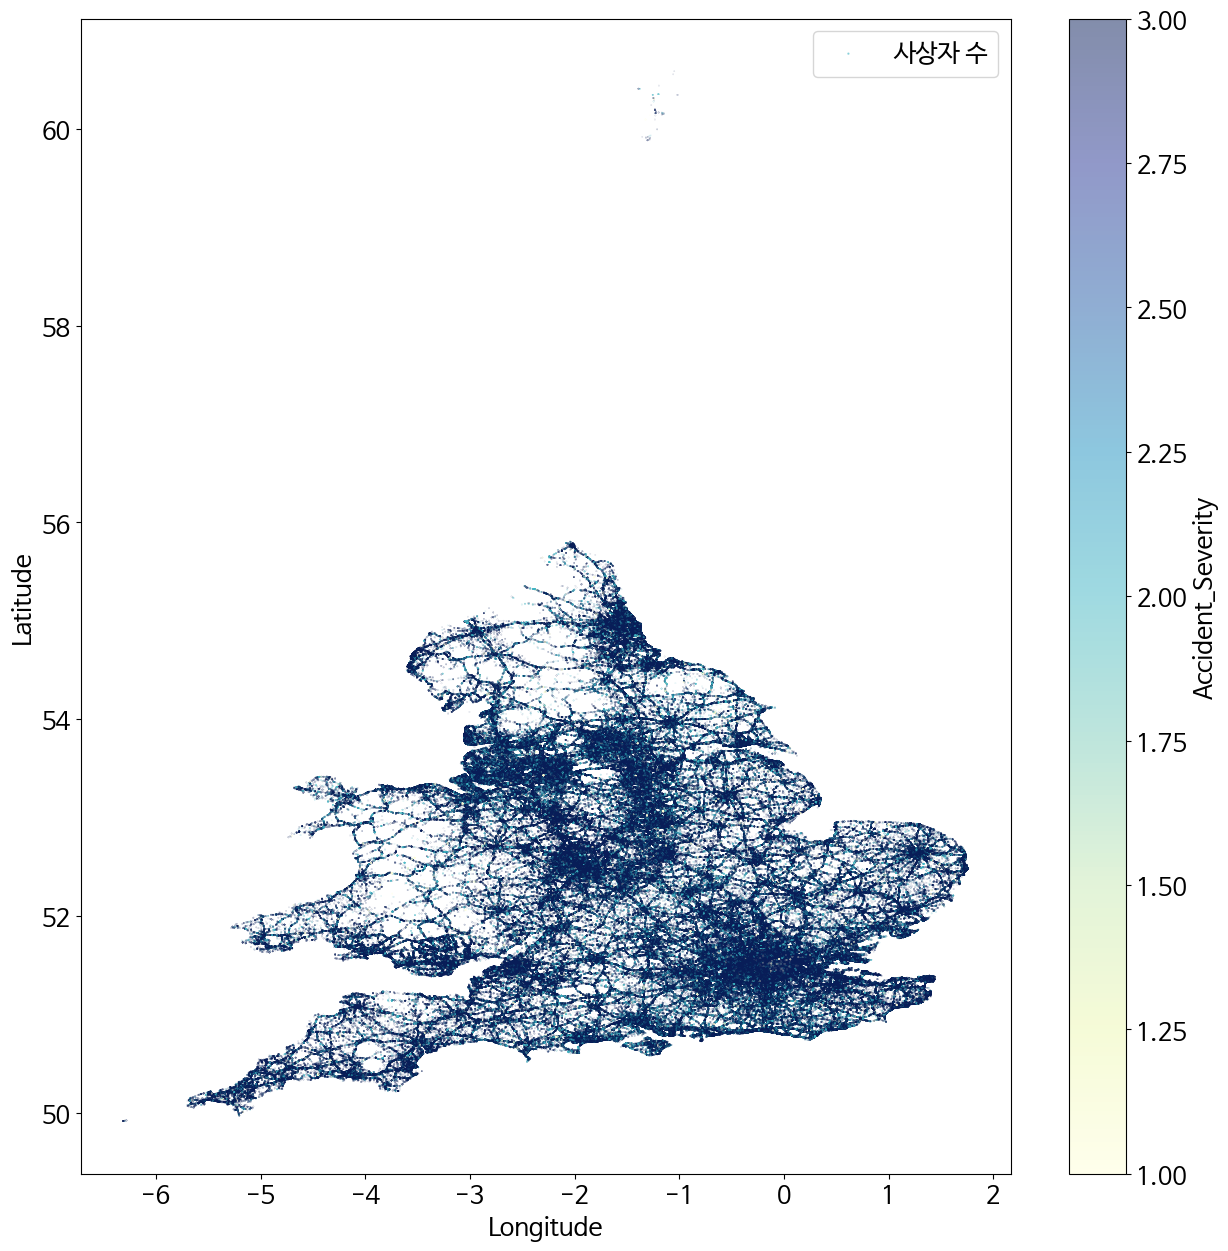

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.5,
             s = df["Number_of_Casualties"]/100, label = "사상자 수", figsize=(15,15),
             c = "Accident_Severity", cmap = plt.get_cmap("YlGnBu"), colorbar= True
             )
plt.legend()

<ipython-input-8-484199c4bc64>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['1차선', '2차선', '원형 교차로', '일반 통행', '출입로', '알 수 없음'])


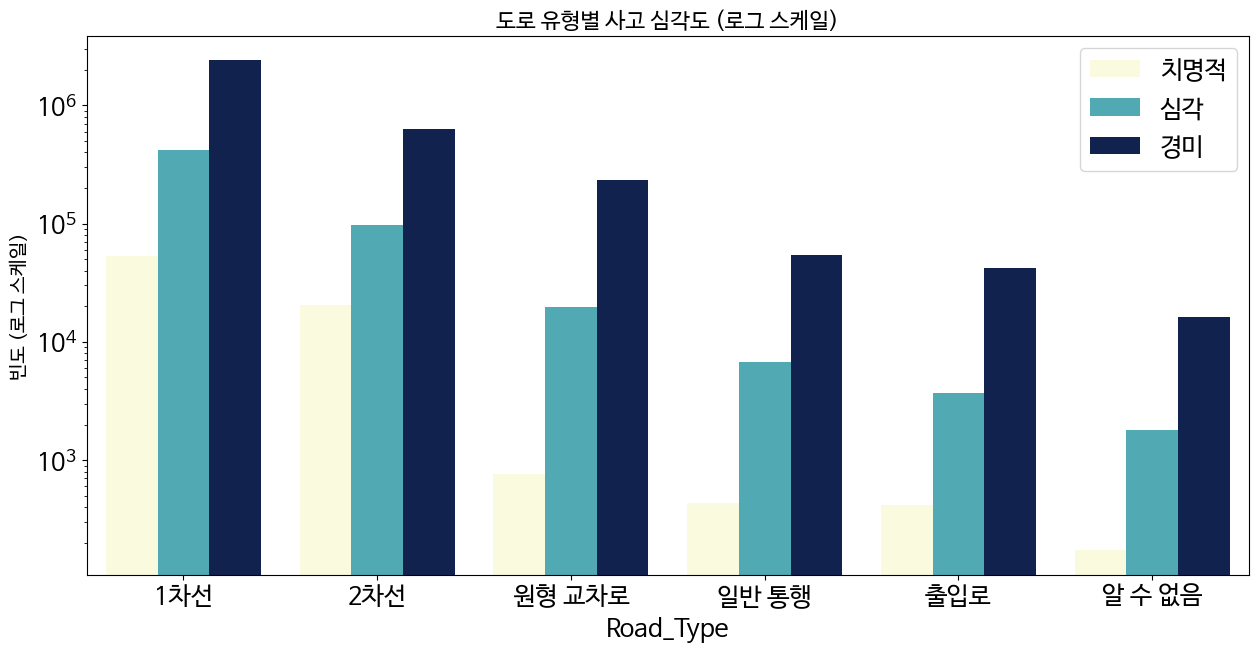

In [8]:
plt.figure(figsize=(15, 7))
ax = sns.countplot(
    x='Road_Type',
    hue='Accident_Severity',
    data=df,
    order=df["Road_Type"].value_counts().index,
    palette="YlGnBu"
)
ax.set_xticklabels(['1차선', '2차선', '원형 교차로', '일반 통행', '출입로', '알 수 없음'])
plt.legend(['치명적', '심각', '경미'])
plt.yscale('log')
plt.ylabel("빈도 (로그 스케일)", fontsize=14)
plt.title("도로 유형별 사고 심각도 (로그 스케일)", fontsize=16)
plt.show()
